Importing the necessary libraries

In [1]:
# Linear algebra
import numpy as np 

# Data processing
import pandas as pd 

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

Load Data dan Menampilkan Data

In [2]:
df= pd.read_csv('heart_failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,class_label
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Melihat jumlah baris dan kolom
df.shape

(299, 13)

In [4]:
# Tipe data setiap kolom
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
class_label                   int64
dtype: object

MISSING VALUE (Data Cleaning = Mengganti nilai yang null dengan nilai rata-rata yang paling sering muncul di komlom tersebut)

In [5]:
# Presentase missing value

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
class_label,0,0.0
time,0,0.0
smoking,0,0.0
sex,0,0.0
serum_sodium,0,0.0


In [6]:
#Mean, Median, Minimum , Maximum 

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,class_label
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


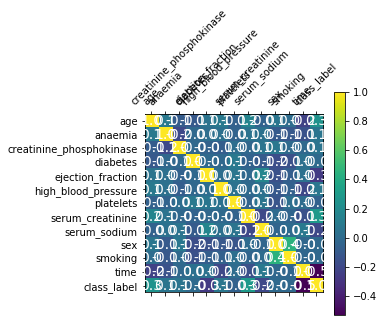

In [7]:
# Korelasi

plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)


In [8]:
X = df.drop(['class_label'], axis=1)
Y = df['class_label']

In [9]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [10]:
#Splitting data ke test data dan training data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(Y_train.shape)

(209, 12)
(209,)


In [11]:
from sklearn import preprocessing

categorical = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
# Menggunakan StandardScalar untuk normalisasi data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [13]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.936961,-0.886750,0.681813,-0.878172,0.407815,-0.748132,-1.811493,2.004664,-0.119376,0.740370,1.488417,1.551191
1,-0.026744,1.127714,0.704741,1.138729,1.909722,-0.748132,-1.000243,-0.377566,1.266717,-1.350676,-0.671855,-1.225795
2,0.551479,-0.886750,0.681813,1.138729,-0.718616,-0.748132,-0.161019,0.069102,-0.119376,0.740370,1.488417,1.097806
3,-1.857784,-0.886750,-0.074818,-0.878172,0.783291,1.336663,0.342516,-0.675345,0.804686,-1.350676,-0.671855,0.559411
4,-0.990449,-0.886750,-0.969019,-0.878172,0.783291,1.336663,-1.140114,-0.675345,-0.581408,0.740370,1.488417,0.077688


In [14]:
# Decision Tree 

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [15]:
# Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [16]:
# KNN 2
classifier1 = KNeighborsClassifier(n_neighbors=2)
classifier1.fit(X_train, Y_train)
Y_pred = classifier1.predict(X_test)
acc_knn2 = round(classifier1.score(X_train, Y_train) * 100, 2)


In [17]:
# KNN 3
classifier2 = KNeighborsClassifier(n_neighbors=3)
classifier2.fit(X_train, Y_train)
Y_pred = classifier2.predict(X_test)
acc_knn3 = round(classifier2.score(X_train, Y_train) * 100, 2)


In [18]:
# KNN 4
classifier3 = KNeighborsClassifier(n_neighbors=4)
classifier3.fit(X_train, Y_train)
Y_pred = classifier3.predict(X_test)
acc_knn4 = round(classifier3.score(X_train, Y_train) * 100, 2)


In [19]:
# KNN 5
classifier4 = KNeighborsClassifier(n_neighbors=5)
classifier4.fit(X_train, Y_train)
Y_pred = classifier4.predict(X_test)
acc_knn5 = round(classifier4.score(X_train, Y_train) * 100, 2)


In [20]:
# SVM

svm1 = svm.SVC()
svm1.fit(X_train, Y_train)
Y_pred = svm1.predict(X_test)
acc_svm = round(svm1.score(X_train, Y_train) * 100, 2)

In [21]:
# Random Forest

random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)


In [22]:
# Akurasi

results = pd.DataFrame({
    'Model': ['Decision Tree','Naive Bayes', 'KNN K=2','KNN K=3','KNN K=4','KNN K=5','SVM','Random Forest'],
    'Score': [acc_decision_tree,acc_gaussian,acc_knn2, acc_knn3, acc_knn4, acc_knn5, acc_svm, acc_random_forest ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
100.00,Decision Tree
100.00,Random Forest
90.43,SVM
85.65,KNN K=3
82.78,KNN K=5
81.82,KNN K=2
81.34,Naive Bayes
79.43,KNN K=4
